
# CAR FIRST REQISTRATION IN FINLAND 2016 - 2024


**Import pandas etc.**

Please notice there might be a need to install the libraries.

In [10]:
import pandas as pd
import numpy as np
#from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns



lets get our dataframe

In [337]:
np.set_printoptions(suppress=True, precision = 2)

rekist= pd.read_csv('tilasto_ensirekisteroinnit.csv', delimiter= ';') #This file is originally from Traficom!! 
#Tiedosto saatu Traficomilta!

#Korjataan tiedoston ä ja ö kirjaimien luomat ongelmat. Alkuperäisessä tiedostossa ne eivät ole oikein.
rekist.rename(columns={
  'K�ytt�voima': 'Käyttövoima'},
  inplace=True)

rekist["Merkki"] = rekist["Merkki"].replace("Henkil�autot yhteens�", "Henkilöautot yhteensä")
rekist["Käyttövoima"] = rekist["Käyttövoima"].replace("Yhteens�", "Yhteensä")
rekist["Käyttövoima"] = rekist["Käyttövoima"].replace("S�hk�", "Sähkö")
rekist["Käyttövoima"] = rekist["Käyttövoima"].replace("Diesel/S�hk� (ladattava hybridi)", "Diesel/Sähkö (ladattava hybridi)")
rekist["Käyttövoima"] = rekist["Käyttövoima"].replace("Bensiini/S�hk� (ladattava hybridi)", "Bensiini/Sähkö (ladattava hybridi)")

rekist.rename(columns={
  '2016 Kuukaudet yhteens�': '2016',
  '2017 Kuukaudet yhteens�': '2017',
  '2018 Kuukaudet yhteens�': '2018',
  '2019 Kuukaudet yhteens�': '2019',
  '2020 Kuukaudet yhteens�': '2020',
  '2021 Kuukaudet yhteens�': '2021',
  '2022 Kuukaudet yhteens�': '2022',
  '2023 Kuukaudet yhteens�': '2023',
  '2024 Kuukaudet yhteens�': '2024',
  },
  inplace=True)

print(rekist.head(20))



        Maakunta                 Merkki                         Käyttövoima  \
0   MANNER-SUOMI  Henkilöautot yhteensä                            Yhteensä   
1   MANNER-SUOMI  Henkilöautot yhteensä                            Bensiini   
2   MANNER-SUOMI  Henkilöautot yhteensä                              Diesel   
3   MANNER-SUOMI  Henkilöautot yhteensä                               Sähkö   
4   MANNER-SUOMI  Henkilöautot yhteensä                                Vety   
5   MANNER-SUOMI  Henkilöautot yhteensä                      Maakaasu (CNG)   
6   MANNER-SUOMI  Henkilöautot yhteensä                        Bensiini/CNG   
7   MANNER-SUOMI  Henkilöautot yhteensä  Bensiini/Sähkö (ladattava hybridi)   
8   MANNER-SUOMI  Henkilöautot yhteensä                    Bensiini/Etanoli   
9   MANNER-SUOMI  Henkilöautot yhteensä    Diesel/Sähkö (ladattava hybridi)   
10  MANNER-SUOMI  Henkilöautot yhteensä                    Diesel/Biodiesel   
11  MANNER-SUOMI             Alfa Romeo             

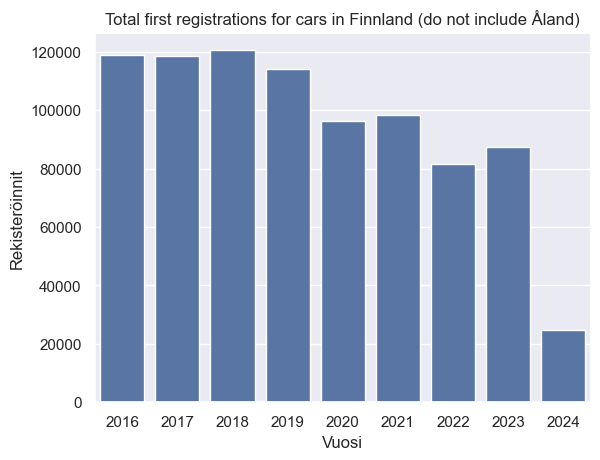

In [332]:
vuodet_yhteensa = rekist[['Maakunta', 'Merkki', 'Käyttövoima', '2016', '2017', '2018', '2019', '2020', 
                         '2021', '2022', '2023', '2024']]

Kaikki_rekisteroinnit_vuosittain = vuodet_yhteensa[(vuodet_yhteensa['Maakunta'] == 'MANNER-SUOMI') & (vuodet_yhteensa['Merkki'] == 'Henkilöautot yhteensä') & (vuodet_yhteensa['Käyttövoima'] == 'Yhteensä')]
Kaikki_rekisteroinnit_vuosittain = Kaikki_rekisteroinnit_vuosittain[['Merkki', '2016', '2017', '2018', '2019', '2020', 
                         '2021', '2022', '2023', '2024']]

Kaikki_rekisteroinnit_vuosittain = Kaikki_rekisteroinnit_vuosittain


melted_vuosittain = Kaikki_rekisteroinnit_vuosittain.melt(id_vars=['Merkki'], var_name='Vuosi', value_name='Rekisteröinnit')

melted_vuosittain['Rekisteröinnit'] = melted_vuosittain['Rekisteröinnit'].astype(int)



sns.barplot(x = 'Vuosi', y = 'Rekisteröinnit', data=melted_vuosittain)
plt.title('Total first registrations for cars in Finnland (do not include Åland)')
plt.show()
plt.close()




**ABOVE:**
We can see the totral first registrations for cars. 2024 is current year so there is not enough data. 


How about if we want to see which cars brands have been sold the most. Lets check first the unique values to see what brands we have in the dataframe

In [143]:
print(rekist["Merkki"].unique())


['Henkilöautot yhteensä' 'Alfa Romeo' 'Alpine' 'Audi' 'Bentley' 'BMW'
 'BMW I' 'Bronto' 'Bus-Prestige' 'BYD' 'Cadillac' 'Challenger' 'Chevrolet'
 'Chrysler' 'Citroen' 'Concorde' 'Cupra' 'Dacia' 'Dangel' 'Dodge' 'DS'
 'Ferrari' 'Fiat' 'Fiat-Capron' 'Fiat-Kabe' 'Ford' 'Honda' 'Hyundai' 'Muu'
 '3816' '3895' 'Jaguar' 'Jeep' 'Kabe' 'Kaiser' '3961' 'Kia' 'Lada' '3833'
 'Lamborghini' 'Land Rover' 'Lexus' 'Lotus' 'MAN' 'Maserati' 'Maxus'
 'Mazda' 'McLaren' 'Mercedes-Benz' 'Mercedes-Benz-Automet' 'Mini'
 'Mitsubishi' 'Nissan' 'Opel' 'Peugeot' '3335' 'Poessl' 'Polestar'
 'Polster' 'Porsche' 'Renault' 'Seat' 'Skoda' 'Smart' 'Sprintcar'
 'Ssangyong' 'Subaru' 'Suzuki' 'Tesla Motors' 'Toyota' 'Volkswagen'
 'Volvo' 'Muut merkit yhteens�' 'Matkailuautot yhteens�']


Above we can see how many different models there is


Lets create a new dataframe with only the different car brands so that we see the total values per year

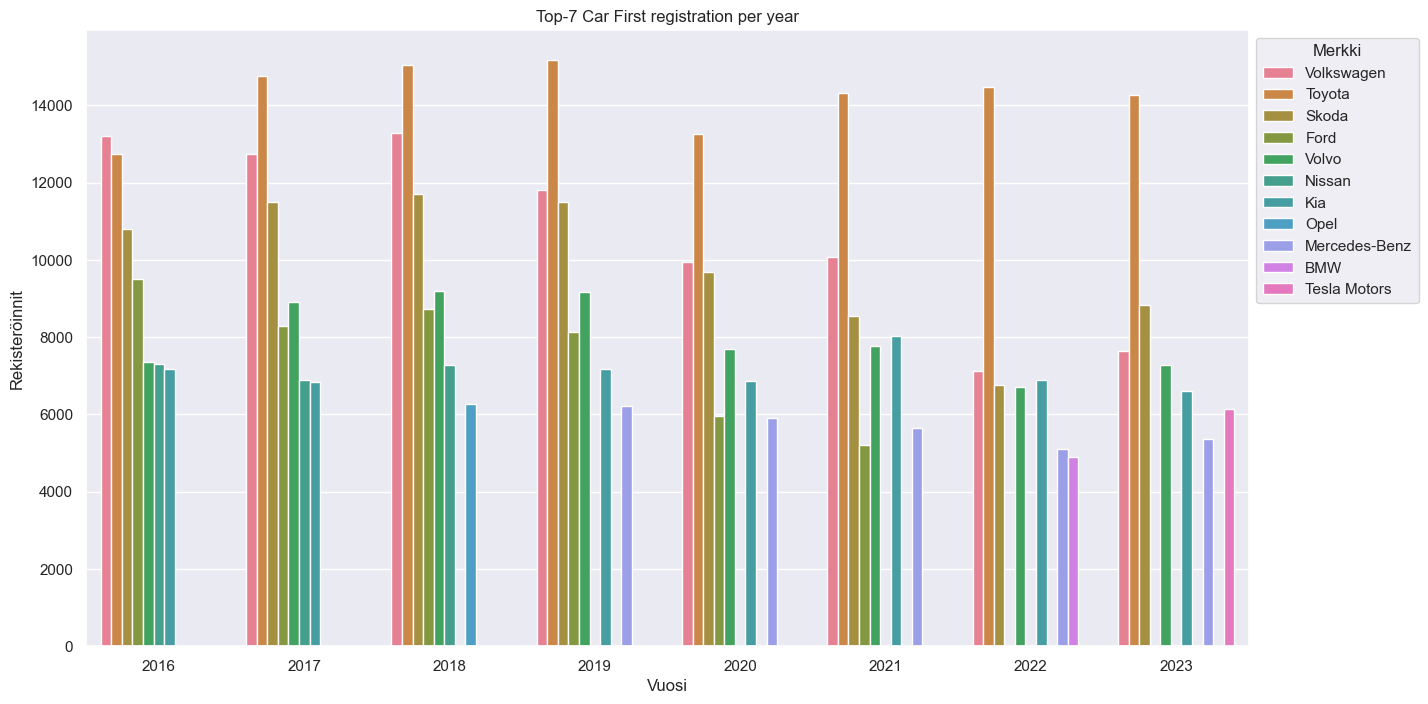

In [336]:
rekisteroinnit_merkeittein = vuodet_yhteensa[(vuodet_yhteensa['Maakunta'] == 'MANNER-SUOMI') & (vuodet_yhteensa['Merkki'] != 'Henkilöautot yhteensä') & (vuodet_yhteensa['Käyttövoima'] == 'Yhteensä')]

rekisteroinnit_merkeittein = rekisteroinnit_merkeittein[['Merkki', '2016', '2017', '2018', '2019', '2020', 
                         '2021', '2022', '2023', '2024']]
#print(rekisteroinnit_merkeittein.head(20))

# There is now sign - indicating 0 value. Lets change that so that there is 0 value for all - signs. 

rekisteroinnit_merkeittein[['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']] = rekisteroinnit_merkeittein[['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].replace('-', '0')

melted_merkeittäin = rekisteroinnit_merkeittein.melt(id_vars=['Merkki'], var_name='Vuosi', value_name='Rekisteröinnit')

#Lets change the values to integers so that the barplot will work correctly
melted_merkeittäin['Rekisteröinnit'] = melted_merkeittäin['Rekisteröinnit'].astype(int) 
melted_merkeittäin['prosentti'] = pd.Series(dtype='int')
#Lets check most sold cars in 2016 (top10)
sorted_2016 = melted_merkeittäin[(melted_merkeittäin['Vuosi'] == '2016')].sort_values(by='Rekisteröinnit', ascending=False)
sorted_2017 = melted_merkeittäin[(melted_merkeittäin['Vuosi'] == '2017')].sort_values(by='Rekisteröinnit', ascending=False)
sorted_2018 = melted_merkeittäin[(melted_merkeittäin['Vuosi'] == '2018')].sort_values(by='Rekisteröinnit', ascending=False)
sorted_2019 = melted_merkeittäin[(melted_merkeittäin['Vuosi'] == '2019')].sort_values(by='Rekisteröinnit', ascending=False)
sorted_2020 = melted_merkeittäin[(melted_merkeittäin['Vuosi'] == '2020')].sort_values(by='Rekisteröinnit', ascending=False)
sorted_2021 = melted_merkeittäin[(melted_merkeittäin['Vuosi'] == '2021')].sort_values(by='Rekisteröinnit', ascending=False)
sorted_2022 = melted_merkeittäin[(melted_merkeittäin['Vuosi'] == '2022')].sort_values(by='Rekisteröinnit', ascending=False)
sorted_2023 = melted_merkeittäin[(melted_merkeittäin['Vuosi'] == '2023')].sort_values(by='Rekisteröinnit', ascending=False)
sorted_2024 = melted_merkeittäin[(melted_merkeittäin['Vuosi'] == '2024')].sort_values(by='Rekisteröinnit', ascending=False)

combined_df = [sorted_2016.head(7), sorted_2017.head(7), sorted_2018.head(7), sorted_2019.head(7), sorted_2020.head(7), sorted_2021.head(7), sorted_2022.head(7), sorted_2023.head(7)]
sorted_by_year = pd.concat(combined_df, ignore_index=True) 


#top7_myynnit_vuosittain = melted_merkeittäin[ (melted_merkeittäin['Merkki'] == 'Toyota') | (melted_merkeittäin['Merkki'] == 'Volkswagen')
#                                             | (melted_merkeittäin['Merkki'] == 'Skoda')| (melted_merkeittäin['Merkki'] == 'Ford') | (melted_merkeittäin['Merkki'] == 'Volvo') 
#                                             | (melted_merkeittäin['Merkki'] == 'Nissan') | (melted_merkeittäin['Merkki'] == 'Kia')]



sorted_by_year['Merkki'] = sorted_by_year['Merkki'].astype('string')


sns.set_theme()


plt.figure(figsize=(15, 8))
top_10_myynnit_fig = sns.barplot(x = 'Vuosi', y = 'Rekisteröinnit', hue='Merkki', data=sorted_by_year)
sns.move_legend(top_10_myynnit_fig, "upper left", bbox_to_anchor=(1, 1))
plt.title('Top-7 Car First registration per year')
plt.show()
plt.close()

#plt.figure(figsize=(10, 6))
#top_7_myynnit_fig = sns.barplot(x = 'Vuosi', y = 'Rekisteröinnit', hue='Merkki', data=top7_myynnit_vuosittain)
#sns.move_legend(top_7_myynnit_fig, "upper left", bbox_to_anchor=(1, 1))
#plt.title('Top-7 Car First registration per year')
#plt.show()
#plt.close()


#There has to be better way for this. Have to change this section later. Maybe using Lambda? it should work... or def a function where we check year and then check the percent value.
top7_2016 = sorted_by_year[(sorted_by_year['Vuosi'] == '2016')]
top7_2016.loc[:, 'prosentti'] = (top7_2016['Rekisteröinnit'] / top7_2016['Rekisteröinnit'].sum() * 100).round(2)

top7_2017 = sorted_by_year[(sorted_by_year['Vuosi'] == '2017')]
top7_2017.loc[:, 'prosentti'] = (top7_2017['Rekisteröinnit'] / top7_2017['Rekisteröinnit'].sum() * 100).round(2)

top7_2018 = sorted_by_year[(sorted_by_year['Vuosi'] == '2018')]
top7_2018.loc[:, 'prosentti'] = (top7_2018['Rekisteröinnit'] / top7_2018['Rekisteröinnit'].sum() * 100).round(2)

top7_2019 = sorted_by_year[(sorted_by_year['Vuosi'] == '2019')]
top7_2019.loc[:, 'prosentti'] = (top7_2019['Rekisteröinnit'] / top7_2019['Rekisteröinnit'].sum() * 100).round(2)

top7_2020 = sorted_by_year[(sorted_by_year['Vuosi'] == '2020')]
top7_2020.loc[:,'prosentti'] = (top7_2020['Rekisteröinnit'] / top7_2020['Rekisteröinnit'].sum() * 100).round(2)

top7_2021 = sorted_by_year[(sorted_by_year['Vuosi'] == '2021')]
top7_2021.loc[:,'prosentti'] = (top7_2021['Rekisteröinnit'] / top7_2021['Rekisteröinnit'].sum() * 100).round(2)

top7_2022 = sorted_by_year[(sorted_by_year['Vuosi'] == '2022')]
top7_2022.loc[:,'prosentti'] = (top7_2022['Rekisteröinnit'] / top7_2022['Rekisteröinnit'].sum() * 100).round(2)

top7_2023= sorted_by_year[(sorted_by_year['Vuosi'] == '2023')]
top7_2023.loc[:,'prosentti'] = (top7_2023['Rekisteröinnit'] / top7_2023['Rekisteröinnit'].sum() * 100).round(2)

top7_2024 = sorted_by_year[(sorted_by_year['Vuosi'] == '2024')]
top7_2024.loc[:,'prosentti'] = (top7_2024['Rekisteröinnit'] / top7_2024['Rekisteröinnit'].sum() * 100).round(2)

compine= [top7_2016, top7_2017, top7_2018, top7_2019, top7_2020, top7_2021, top7_2022, top7_2023, top7_2024]

top7_with_percent = pd.concat(compine, ignore_index=True)





HEre we can see top 7 car models with quantities. Notice that this does not take in consideration that if the total car reqistrations(sales) has gone down or up.

Below we take a look on the share of the car compared to the other models so it will show more easily the changes between popularity of the cars.


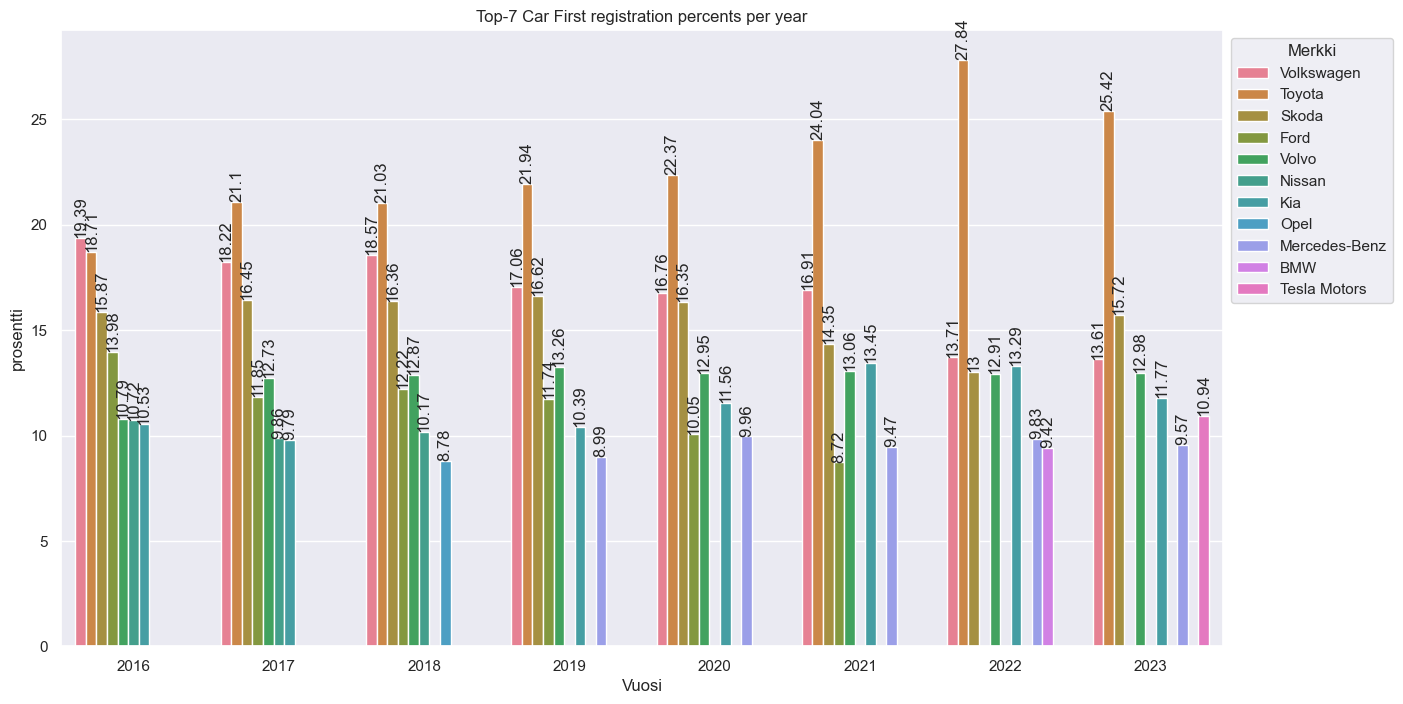

In [335]:

plt.figure(figsize=(15, 8))
top_7_percent_fig = sns.barplot(x = 'Vuosi', y = 'prosentti', hue='Merkki', data=top7_with_percent)
for container in top_7_percent_fig.containers:
    top_7_percent_fig.bar_label(container, rotation=90)

sns.move_legend(top_7_percent_fig, "upper left", bbox_to_anchor=(1, 1))
plt.title('Top-7 Car First registration percents per year')
plt.show()
plt.close()


From the figure above we can see:

The precents per model only indicates the share compared to the other top 7 car models. NOT for all models in Finland!

Volkswagen has been most popular in 2016 but after that Toyota has been every year the most popular one.

**NOTICE!:** On the charts there is missing bars from 2018 forward. This means that the specific car-model is under the top7 mark and there is a new car model in the top 7 ranking.


TO CONTINUE
- Cars per driving force of the  car (Diesel, electric etc) per year
- To check which electric car brands are most popular